In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bike_day = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/bike_day.csv', sep = ',')

In [3]:
bike_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


**Data Description**

In [4]:
'''instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered'''

'instant: record index\n- dteday : date\n- season : season (1:winter, 2:spring, 3:summer, 4:fall)\n- yr : year (0: 2011, 1:2012)\n- mnth : month ( 1 to 12)\n- hr : hour (0 to 23)\n- holiday : weather day is holiday or not (extracted from [Web Link])\n- weekday : day of the week\n- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.\n+ weathersit :\n- 1: Clear, Few clouds, Partly cloudy, Partly cloudy\n- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist\n- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds\n- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog\n- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)\n- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)\n- hum: Normalized humidity. The values are divided to 100 (

**Data manipulation**

In [5]:
bike_day.shape

(731, 16)

In [6]:
bike_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
bike_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [9]:
bike_day['dteday'] = pd.to_datetime(bike_day.dteday) 

In [10]:
bike_day.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [14]:
# axis = 1 in pandas means columnwise operation
bike_day.rename(columns={'dteday':'datetime', 'yr':'year', 'mnth':'month', 'hum':'humidity', 'cnt':'count'}, inplace=True)

In [15]:
bike_day

,instant,datetime,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


**EDA**

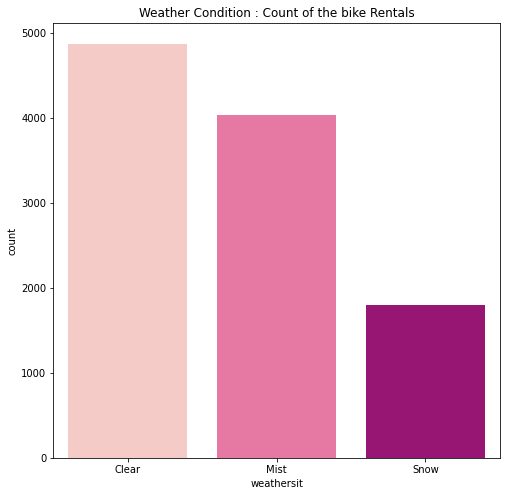

In [19]:
# bike count values in weather condition
plt.figure(figsize = (8,8))
ax = sns.barplot(x = 'weathersit', y = 'count', data = bike_day, palette='RdPu', ci= None)
ax.set_title("Weather Condition : Count of the bike Rentals")   # set title
ax.set_xticklabels(['Clear', 'Mist', 'Snow'])
plt.show()

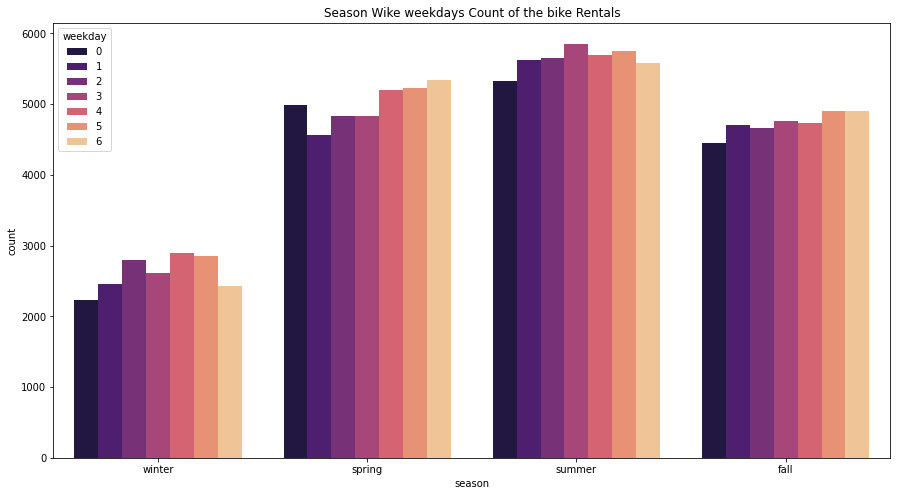

In [30]:
# Season Wike weekdays bike count 
plt.figure(figsize = (15,8))
ax = sns.barplot(x = 'season', y = 'count', data = bike_day, hue = 'weekday', palette='magma', ci= None)
ax.set_title("Season Wike weekdays Count of the bike Rentals")   # set title
ax.set_xticklabels(['winter','spring','summer','fall'])
plt.show()

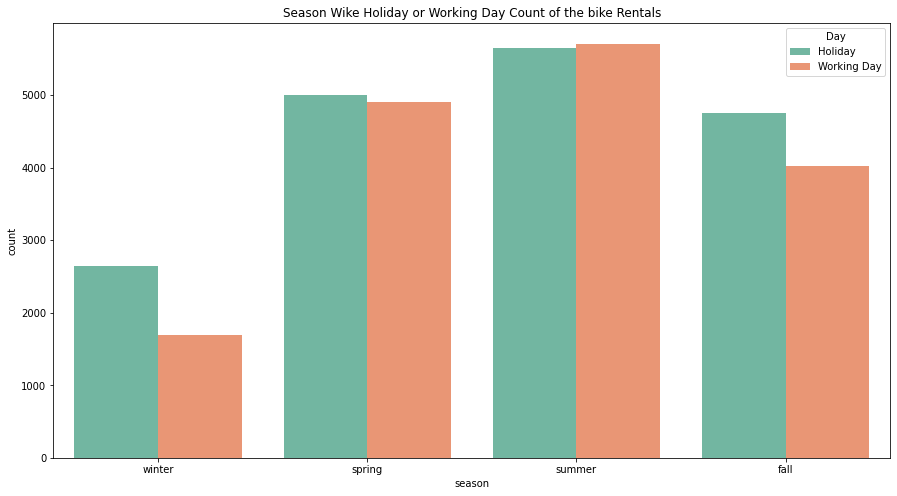

In [37]:
# Season Wike weekdays bike count 
plt.figure(figsize = (15,8))
ax = sns.barplot(x = 'season', y = 'count', data = bike_day, hue = 'holiday', palette='Set2', ci= None)
ax.set_title("Season Wike Holiday or Working Day Count of the bike Rentals")   # set title
ax.set_xticklabels(['winter','spring','summer','fall'])
ax.legend(title = "Day", labels = ['Holiday', 'Working Day'])
plt.show()

Text(0.5, 1.0, 'Bike count on weekdays by monthly basis')

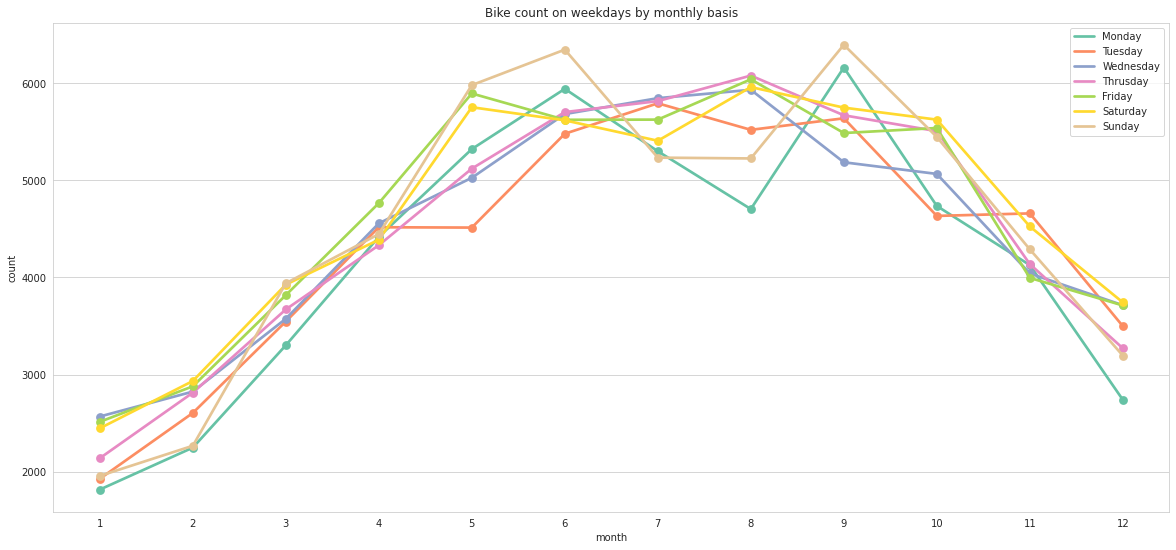

In [48]:
# Consistenty of Bike Demand Count on Weekdays by Monthly basis 
sns.set_style('whitegrid')
plt.figure(figsize=(20,9)) # set figure size

ax = sns.pointplot(x = 'month', y = 'count', data = bike_day, hue = 'weekday', ci = None, palette='Set2')
ax.legend(['Monday', 'Tuesday', 'Wednesday', 'Thrusday', 'Friday', 'Saturday', 'Sunday']) # set legend
ax.set_title('Bike count on weekdays by monthly basis')


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


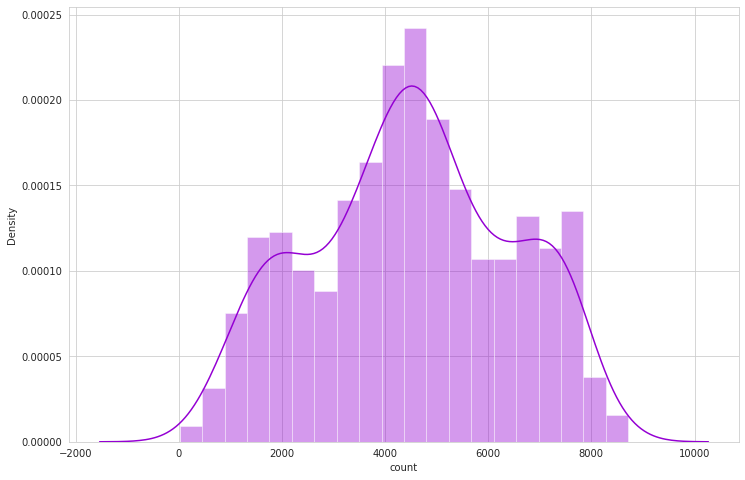

In [50]:
plt.figure(figsize=(12,8))
sns.distplot(bike_day['count'], bins=20, color = 'darkviolet')
plt.show()